<a href="https://colab.research.google.com/github/woodskd24/MentalHealthinUSA/blob/main/Bipolar_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Data From https://data.world/vizzup/mental-health-depression-disorder-data/workspace/file?filename=Mental+health+Depression+disorder+Data.xlsx
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/MHPred.csv')
df

,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,1990,0.340897,0.653706,0.468676,6.576884,2.367794,4.677591,2.173751
1,1991,0.338913,0.653953,0.473575,6.553351,2.345466,4.660871,2.139292
2,1992,0.337343,0.654205,0.478610,6.536143,2.339515,4.651949,2.107931
3,1993,0.336207,0.654431,0.483539,6.525536,2.347095,4.648701,2.080669
4,1994,0.335536,0.654620,0.488235,6.522278,2.365738,4.649294,2.058632
5,1995,0.335363,0.654721,0.492368,6.526489,2.392582,4.650869,2.042931
6,1996,0.335806,0.654749,0.496752,6.578023,2.456048,4.662902,2.033987
7,1997,0.336797,0.654720,0.501560,6.688847,2.564591,4.689154,2.030590
8,1998,0.338085,0.654658,0.506483,6.818473,2.688823,4.720716,2.031176
9,1999,0.339410,0.654564,0.511072,6.926351,2.800595,4.749991,2.034175


In [4]:
X = df[['Year']]
y = df['Bipolar disorder (%)']

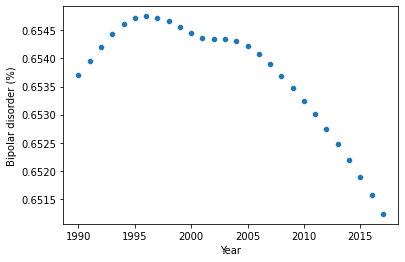

In [5]:
sns.scatterplot(x = "Year", y = "Bipolar disorder (%)", data = df)

#Weka

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
import xgboost as xgb
from scipy.stats import uniform, randint

In [8]:
xgb = xgb.XGBRegressor(objective="reg:linear", random_state=42)

x1 = xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)])

y_pred1 = x1.predict(X_test)

[16:45:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.138919
[1]	validation_0-rmse:0.125697
[2]	validation_0-rmse:0.11373
[3]	validation_0-rmse:0.102901
[4]	validation_0-rmse:0.0931
[5]	validation_0-rmse:0.084231
[6]	validation_0-rmse:0.076204
[7]	validation_0-rmse:0.06894
[8]	validation_0-rmse:0.062366
[9]	validation_0-rmse:0.056416
[10]	validation_0-rmse:0.051032
[11]	validation_0-rmse:0.04616
[12]	validation_0-rmse:0.04175
[13]	validation_0-rmse:0.03776
[14]	validation_0-rmse:0.034149
[15]	validation_0-rmse:0.030881
[16]	validation_0-rmse:0.027923
[17]	validation_0-rmse:0.025247
[18]	validation_0-rmse:0.022825
[19]	validation_0-rmse:0.020634
[20]	validation_0-rmse:0.018651
[21]	validation_0-rmse:0.016857
[22]	validation_0-rmse:0.015233
[23]	validation_0-rmse:0.013764
[24]	validation_0-rmse:0.012435
[25]	validation_0-rmse:0.011233
[26]	validation_0-rmse:0.010145
[27]	validation_0-rmse:0.0

In [9]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred1)
meanSqErr = metrics.mean_squared_error(y_test, y_pred1)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred1))
print('R squared: {:.2f}'.format(x1.score(X_train,y_train)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 89.41
Mean Absolute Error: 0.00021379141483221818
Mean Square Error: 8.281282925606814e-08
Root Mean Square Error: 0.00028777218290875183


In [10]:
print("Prediction for test set: {}".format(y_pred1))

Prediction for test set: [0.6521541 0.6538759 0.6538759 0.6538759 0.65424   0.65424   0.6526975
 0.65424   0.6526975]


In [11]:
xG_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred1})
xG_diff.head()

,Actual value,Predicted value
24,0.652195,0.652154
17,0.653896,0.653876
19,0.653468,0.653876
20,0.653247,0.653876
14,0.654313,0.654240


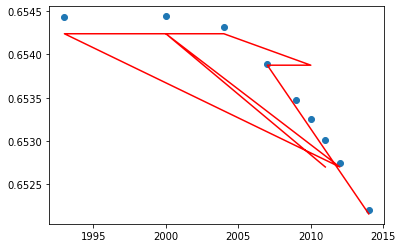

In [12]:
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred1, 'Red')
plt.show()